# MNIST - KNN CLASSIFIER

### Importando os dados MNIST

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)

#### Separando em atributo previsores e atributo alvo

In [2]:
X, y = mnist["data"], mnist["target"]

#### Determinando conjunto de treinamento e o cojunto de teste

In [3]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

#### Inicializando o modelo KNN

In [4]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

### Utilizando grid_search para encontrar melhores parametros

O grid_search irá testar todas as combinações de parametros e avaliar o melhor modelo

In [5]:
from sklearn.model_selection import GridSearchCV

params = [{
    'n_neighbors' : [3, 5, 7],
    'weights' : ['uniform', 'distance'],
}]

grid = GridSearchCV(knn_clf, params, cv=3, verbose=3)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  30.8s
[CV 2/3] END ....n_neighbors=3, weights=uniform;, score=0.968 total time=  24.3s
[CV 3/3] END ....n_neighbors=3, weights=uniform;, score=0.968 total time=  23.2s
[CV 1/3] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  21.6s
[CV 2/3] END ...n_neighbors=3, weights=distance;, score=0.969 total time=  21.8s
[CV 3/3] END ...n_neighbors=3, weights=distance;, score=0.969 total time=  23.8s
[CV 1/3] END ....n_neighbors=5, weights=uniform;, score=0.968 total time=  26.2s
[CV 2/3] END ....n_neighbors=5, weights=uniform;, score=0.967 total time=  25.1s
[CV 3/3] END ....n_neighbors=5, weights=uniform;, score=0.968 total time=  25.5s
[CV 1/3] END ...n_neighbors=5, weights=distance;, score=0.969 total time=  24.7s
[CV 2/3] END ...n_neighbors=5, weights=distance;, score=0.968 total time=  24.7s
[CV 3/3] END ...n_neighbors=5, weights=distance;,

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

Avaliando os resultados do grid_search

In [6]:
grid.best_score_

0.9693333333333333

Utilizando o melhor modelo encontrado pelo grid_search para o knn classifier

In [7]:
best_knn = grid.best_estimator_

Criando uma função para mostrar o resultado o classificador

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

def resultados(y_real, y_pred):
    accuracy = accuracy_score(y_real, y_pred)
    precision = precision_score(y_real, y_pred, average='macro')
    recall = recall_score(y_real, y_pred, average='macro')
    f1 = f1_score(y_real, y_pred, average='macro')
    print('-----RESULTADOS------')
    print('Accuracy: {}'.format(accuracy))
    print('Precision: {}'.format(precision))
    print('Recall: {}'.format(recall))
    print('F1: {}'.format(f1))
    
    cm = confusion_matrix(y_real, y_pred)
    plt.matshow(cm)

Utilizando o melhor modelo para predição dos dados de teste

In [9]:
y_pred = best_knn.predict(X_test)

Mostrando os resultados da classificação

-----RESULTADOS------
Accuracy: 0.9717
Precision: 0.9719031233123564
Recall: 0.9713357268999042
F1: 0.971528765919764


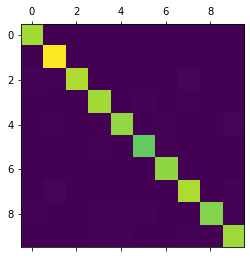

In [10]:
resultados(y_test, y_pred)

## Data augmentation

Para aumentar a variabilidade dos dados de treino, será feito o shift de 1 pixel para cada direção

In [11]:
from scipy.ndimage.interpolation import shift

Criando uma função para aplicar o shift nas imagens

In [12]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode='constant')
    return shifted_image.reshape([-1])

Aplicando a função nas imagens

In [13]:
import numpy as np
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [14]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

Inicializando o classificador com os parametros encontrados pelo grid search

In [16]:
knn_clf = KNeighborsClassifier(**grid.best_params_)

In [17]:
knn_clf.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(n_neighbors=3, weights='distance')

Fazendo as prediçoes com o dados de teste e avaliando os resultados

In [18]:
y_pred = knn_clf.predict(X_test)

0.9763

-----RESULTADOS------
Accuracy: 0.9763
Precision: 0.9765137689595775
Recall: 0.9760196008881692
F1: 0.9762028901251858


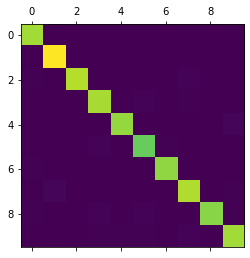

In [19]:
resultados(y_test, y_pred)